In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


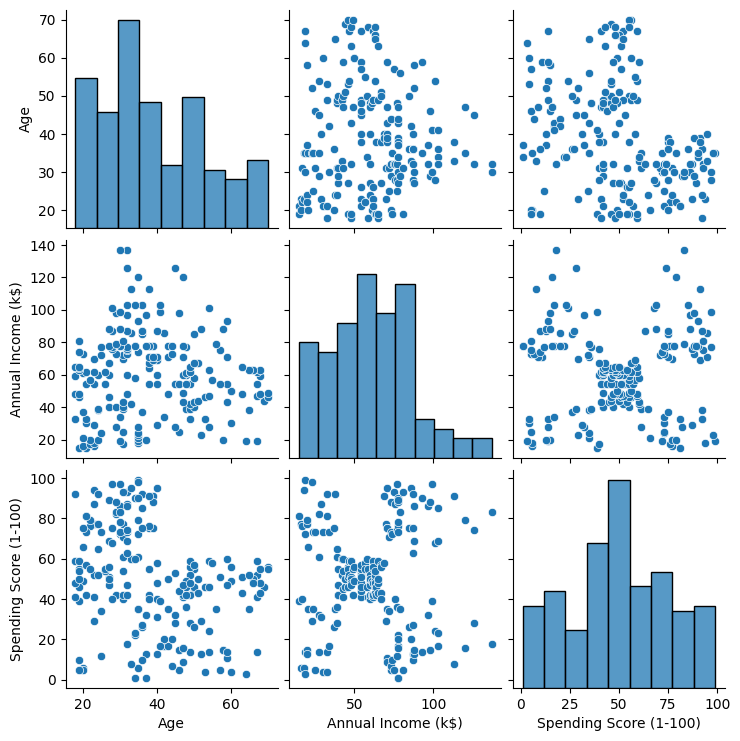

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

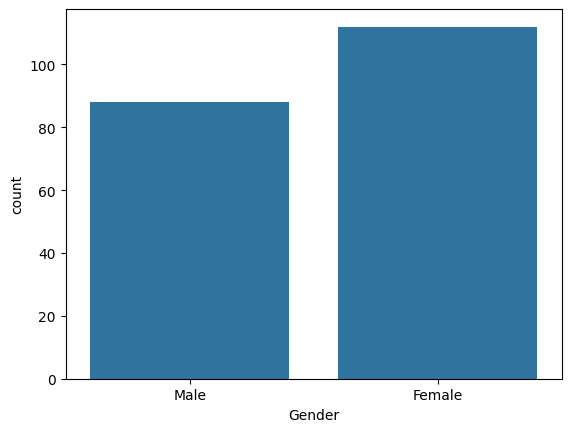

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


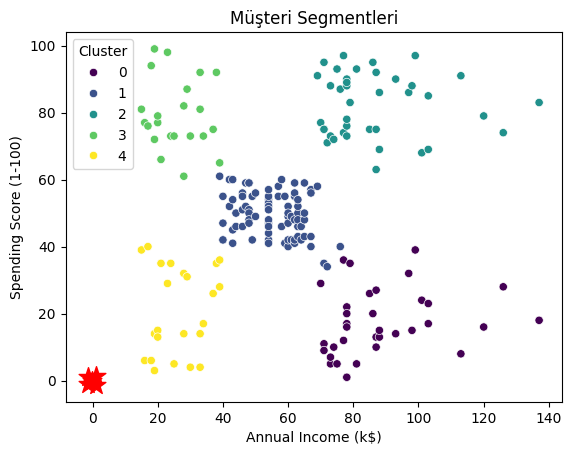

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        41.114286           88.200000               17.114286
1        42.716049           55.296296               49.518519
2        32.692308           86.538462               82.128205
3        25.272727           25.727273               79.363636
4        45.217391           26.304348               20.913043


In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Küme Merkezleri')
plt.title("Müşteri Segmentleri")
plt.show()

print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

In [ ]:
import altair as alt

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
df['Cluster'] = dbscan.fit_predict(X_scaled)

In [ ]:
outliers = df[df['Cluster'] == -1]

In [ ]:
cluster_centers = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [ ]:
chart = alt.Chart(df).mark_circle().encode(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color=alt.Color('Cluster:N', scale=alt.Scale(domain=[str(i) for i in df['Cluster'].unique()]), legend=alt.Legend(title="Kümeler")),
    tooltip=['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
).properties(
    title='Müşteri Segmentleri (DBSCAN)'
).interactive()

In [ ]:
centers_df = pd.DataFrame(cluster_centers.reset_index())
centers_chart = alt.Chart(centers_df).mark_point(shape='star', size=200, filled=True).encode(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color=alt.value('red')
)

In [ ]:
combined_chart = chart + centers_chart
combined_chart.save('musteri_segmentleri_dbscan.json')

In [ ]:
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
-1       37.490196           58.333333               44.470588
 0       25.181818           23.090909               74.636364
 1       42.804598           55.413793               48.816092
 2       32.931034           79.241379               83.620690
 3       41.000000           80.181818               12.681818


In [ ]:
print(f"\nAykırı değer sayısı: {len(outliers)}")


Aykırı değer sayısı: 51


In [ ]:
filtered_df = df[df['Cluster'] != -1].copy()

In [ ]:
cluster_means = filtered_df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Filtrelenmiş Kümelerin Ortalamaları:\n", cluster_means.to_markdown(numalign="left", stralign="left"))

Filtrelenmiş Kümelerin Ortalamaları:
 | Cluster   | Age     | Annual Income (k$)   | Spending Score (1-100)   |
|:----------|:--------|:---------------------|:-------------------------|
| 0         | 25.1818 | 23.0909              | 74.6364                  |
| 1         | 42.8046 | 55.4138              | 48.8161                  |
| 2         | 32.931  | 79.2414              | 83.6207                  |
| 3         | 41      | 80.1818              | 12.6818                  |


In [ ]:
cluster_centers = filtered_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [ ]:
chart = alt.Chart(filtered_df).mark_circle().encode(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color=alt.Color('Cluster:N', scale=alt.Scale(domain=[str(i) for i in filtered_df['Cluster'].unique()]), legend=alt.Legend(title="Kümeler")),
    tooltip=['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
).properties(
    title='Müşteri Segmentleri (DBSCAN - Aykırı Değerler Çıkarıldı)'
).interactive()

In [ ]:
centers_df = pd.DataFrame(cluster_centers.reset_index())
centers_chart = alt.Chart(centers_df).mark_point(shape='star', size=200, filled=True).encode(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color=alt.value('red')
)

combined_chart = chart + centers_chart
combined_chart.save('musteri_segmentleri_dbscan_filtered.json')

In [ ]:
df[df["Age"] >= 60].count()
df.shape

(200, 6)

In [ ]:
cluster_centers = filtered_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)',"Age"]].max()
cluster_centers

,Annual Income (k$),Spending Score (1-100),Age
Cluster,,,
0,34,82,31
1,79,65,70
2,98,97,40
3,93,27,59


In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 55, 100], labels=['0-18', '19-35', '36-55', '56+'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Age_Group
0,1,Male,19,15,39,-1,19-35
1,2,Male,21,15,81,-1,19-35
2,3,Female,20,16,6,-1,19-35
3,4,Female,23,16,77,0,19-35
4,5,Female,31,17,40,-1,19-35
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,-1,19-35
196,197,Female,45,126,28,-1,36-55
197,198,Male,32,126,74,-1,19-35
198,199,Male,32,137,18,-1,19-35


In [ ]:
df['Spending_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
index_to_drop = df[df['Cluster'] == -1].index
df.drop(index_to_drop, inplace=True)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Age_Group,Spending_Ratio
3,4,Female,23,16,77,0,19-35,4.812500
5,6,Female,22,17,76,0,19-35,4.470588
9,10,Female,30,19,72,0,19-35,3.789474
13,14,Female,24,20,77,0,19-35,3.850000
15,16,Male,22,20,79,0,19-35,3.950000
...,...,...,...,...,...,...,...,...
176,177,Male,58,88,15,3,56+,0.170455
178,179,Male,59,93,14,3,56+,0.150538
179,180,Male,35,93,90,2,19-35,0.967742
181,182,Female,32,97,86,2,19-35,0.886598
